# Linear Regression with PyTroch

## Import

In [121]:
import torch

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
import torch.nn as nn

## Creating matrix

In [123]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [124]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [125]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)
print(e.sum())

tensor(0.)


In [126]:
y = 2*X +1 +e
print(y.shape)

torch.Size([50, 1])


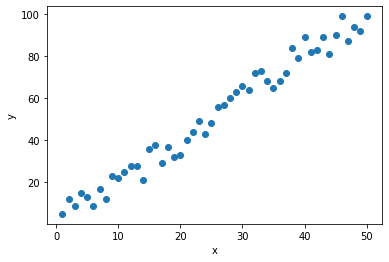

In [127]:
plt.scatter(X.numpy() , y.numpy())
plt.ylabel('y')
plt.xlabel('x');

## PyTorch model

In [128]:
  torch.manual_seed(59)

  model = nn.Linear(in_features=1, out_features=1)
  print(model.weight)
  print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [129]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred 

In [130]:
torch.manual_seed(59)
model = Model(1,1)
print(model)
print("Weight: ", model.linear.weight.item())
print("Bias:   ", model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight:  0.10597813129425049
Bias:    0.9637961387634277


In [131]:
for name, param in model.named_parameters():
    print(name, "\t", param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [132]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [133]:
x1 = np.linspace(0,50,50)
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [134]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [135]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

Text(0.5, 0, 'x')

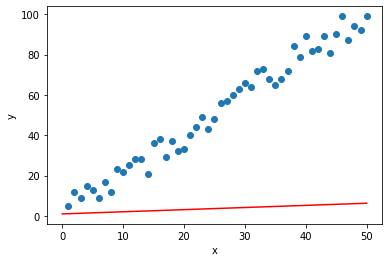

In [136]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1, "r")
plt.ylabel('y')
plt.xlabel('x')

## Loss Func

In [137]:
criterion = nn.MSELoss()

In [138]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

## Train the Model

In [139]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X) # predicting forward pass
    loss = criterion(y_pred, y) # calculating loss
    losses.append(loss.detach().numpy()) # recording error
    print(f'epoch: {i:2} loss: {loss.item():10.8f} weight: {model.linear.weight.item():10.8f} \
        bias: {model.linear.bias.item():10.8f}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1 loss: 3057.21679688 weight: 0.10597813         bias: 0.96379614
epoch:  2 loss: 1588.53112793 weight: 3.33490038         bias: 1.06046367
epoch:  3 loss: 830.29998779 weight: 1.01483274         bias: 0.99226284
epoch:  4 loss: 438.85241699 weight: 2.68179965         bias: 1.04252183
epoch:  5 loss: 236.76152039 weight: 1.48402119         bias: 1.00766504
epoch:  6 loss: 132.42912292 weight: 2.34460592         bias: 1.03396463
epoch:  7 loss: 78.56572723 weight: 1.72622538         bias: 1.01632178
epoch:  8 loss: 50.75775909 weight: 2.17050409         bias: 1.03025162
epoch:  9 loss: 36.40123367 weight: 1.85124576         bias: 1.02149546
epoch: 10 loss: 28.98922920 weight: 2.08060074         bias: 1.02903891
epoch: 11 loss: 25.16238213 weight: 1.91576838         bias: 1.02487016
epoch: 12 loss: 23.18647385 weight: 2.03416562         bias: 1.02911627
epoch: 13 loss: 22.16612625 weight: 1.94905841         bias: 1.02731562
epoch: 14 loss: 21.63911057 weight: 2.01017213         b

## Loss Values and Final Plots

Text(0, 0.5, 'MSE Loss')

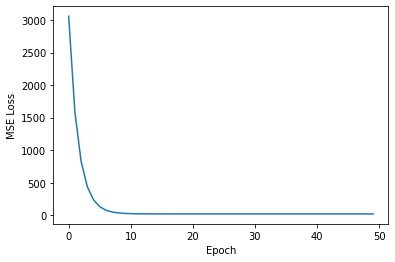

In [140]:
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

In [141]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 1.98381913, Current bias: 1.05575156

[ 0.          1.02040816  2.04081633  3.06122449  4.08163265  5.10204082
  6.12244898  7.14285714  8.16326531  9.18367347 10.20408163 11.2244898
 12.24489796 13.26530612 14.28571429 15.30612245 16.32653061 17.34693878
 18.36734694 19.3877551  20.40816327 21.42857143 22.44897959 23.46938776
 24.48979592 25.51020408 26.53061224 27.55102041 28.57142857 29.59183673
 30.6122449  31.63265306 32.65306122 33.67346939 34.69387755 35.71428571
 36.73469388 37.75510204 38.7755102  39.79591837 40.81632653 41.83673469
 42.85714286 43.87755102 44.89795918 45.91836735 46.93877551 47.95918367
 48.97959184 50.        ]
[  1.05575156   3.08005679   5.10436203   7.12866726   9.15297249
  11.17727772  13.20158295  15.22588818  17.25019342  19.27449865
  21.29880388  23.32310911  25.34741434  27.37171957  29.39602481
  31.42033004  33.44463527  35.4689405   37.49324573  39.51755096
  41.5418562   43.56616143  45.59046666  47.61477189  49.63907712
  51.66

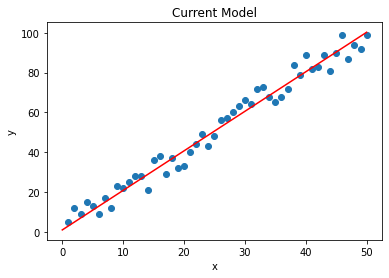

In [142]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');